In [48]:
import extract_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from scipy.signal import filtfilt, butter, iirnotch, welch
import math
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
data, words, starts, ends = extract_data.extract_data(r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\SilentSpeechDAS\EMGData\Vocal_YN_6.txt", r"C:\Users\lwing\Downloads\College\Spring 2022\Senior Design II\silent-speech\scripts\Vocal_YN_6.txt")

2022-03-28T15:58:50.687-05


In [50]:
chan_1 = data[:,0]
chan_2 = data[:,1]
chan_3 = data[:,2]
chan_4 = data[:,3]
chan_5 = data[:,4]
chan_6 = data[:,5]
channel_data = [chan_1, chan_2, chan_3, chan_4, chan_5, chan_6]

### Creating target variable list

In [51]:
len(chan_1)

122700

In [52]:
y = np.zeros(122700)

In [53]:
print(starts)
print(ends)

[ 48969  58085  65362  72261  78830  85455  91848  98480 105006 111441]
[ 50382  59264  66376  73299  79895  86364  92927  99457 105653 112579]


In [54]:
for i in range(len(starts)):
    y[starts[i]:ends[i]+1] = 1

In [55]:
print(np.count_nonzero(y))

10469


In [56]:
len(y)

122700

### Filtering

In [57]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data[idx] = abs(signal_filtered)

In [58]:
print(chan_1)
print(filtered_data[0])

[-0.02555129 -0.03193911 -0.0287452  ... -0.03193911 -0.04152084
 -0.04471475]
[7.92933715e-05 6.68879032e-03 4.25676280e-03 ... 6.39642072e-03
 1.00375383e-03 1.76443420e-04]


### RMS

In [59]:
q = deque([1, 2, 3, 4])
print(np.square(q))
print(sum(np.square(q)))
print(sum(np.square(q))/4)
print(np.sqrt(sum(np.square(q))/4))

[ 1  4  9 16]
30
7.5
2.7386127875258306


In [60]:
rms_window = deque([0,0,0,0,0])

for channel in filtered_data:
    for i, sample in enumerate(channel):
        rms_window.popleft()
        rms_window.append(sample)
        val = np.sqrt(sum(np.square(rms_window)/5))
        channel[i] = val

In [61]:
print(filtered_data[0])

[3.54610738e-05 2.99152815e-03 3.54587741e-03 ... 1.00877381e-02
 6.86865005e-03 6.56332846e-03]


### Deleting extraneous data

In [62]:
#deleting indices :48969,100000-102500 ,112579:

for i in range(len(filtered_data)):
    arr1 = filtered_data[i][48969:100000]
    arr2 = filtered_data[i][102500:112780]
    filtered_data[i] = np.concatenate([arr1, arr2])


In [63]:
len(filtered_data[0])

61311

In [64]:
arr1 = y[48969:100000]
arr2 = y[102500:112780]
y = np.concatenate([arr1, arr2])
len(y)

61311

In [226]:
y_new = np.zeros(int(len(y)/20)+1)
for i, j in enumerate(range(0, len(y), 20)):
    y_new[i] = y[j]


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [65]:
 #large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_new = np.zeros(int(len(y)/20)+1)
i = 0
while ind1 < len(y):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y):
        ind2 = len(y)
                
    num_label = np.count_nonzero(y[ind1:ind2])
    if num_label > 19:
        y_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [66]:
print(len(y))
print(len(y_new))

61311
3066


### Smoothing data as described by SAD doc

In [67]:
    def smooth(raw):
        
        #large window to average over
        window = 40
        
        #overlap interval
        skip = 20
        
        ind1 = 0
        ind2 = window
        copy = np.copy(np.array(raw))
        new = np.zeros(int(len(raw)/20)+1)
        i = 0
        while ind1 < len(raw):
            
            #remaining data less than window size, avoid array out of bounds
            if ind2 > len(raw):
                ind2 = len(raw)
                
            val = np.mean(copy[ind1:ind2], dtype=np.float64)
            new[i] = val
            
            
            ind1 = ind1 + skip
            ind2 = ind2 + skip
            i = i+1
        return new
    
    def calculate(smoothed_envelope):
        
        return np.abs(np.diff(smoothed_envelope))

In [68]:
ready_data = [0,0,0,0,0,0]

for i in range(len(filtered_data)):
    res = smooth(filtered_data[i])
    ready_data[i] = calculate(res)

In [69]:
print(np.count_nonzero(ready_data[0]))

3065


In [70]:
len(ready_data[0])

3065

In [71]:
y_new = y_new[:3065]
print(len(y_new))

3065


In [72]:
print(np.count_nonzero(y_new))

523


***data has been labeled, filtered, smoothed, and had extraneous samples deleted***

### Making dataframe and prepping for decision tree classifier

In [73]:
df = pd.DataFrame({
    
    "Chan1": ready_data[0],
    "Chan2": ready_data[1],
    "Chan3": ready_data[2],
    "Chan4": ready_data[3],
    "Chan5": ready_data[4],
    "Chan6": ready_data[5],
    "Y": y_new 
})
                        

In [74]:
X = df[['Chan1', 'Chan2', 'Chan3', 'Chan4', 'Chan5', 'Chan6']]
Y = df[['Y']]

In [75]:
Y.head()

,Y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [76]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [97]:
len(X_train)

2452

In [98]:
len(X_test)

613

In [91]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
print(clf.score(X_test, y_test))

0.8548123980424144


In [93]:
print(np.mean(cross_val_score(clf, X_train, y_train)))

0.8678656635770399


In [94]:
predicted = clf.predict(X_test)

#I obtain the accuracy of this fold
ac=accuracy_score(predicted,y_test)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(y_test, predicted)
print(cm)

0.8548123980424144
[[458  41]
 [ 48  66]]


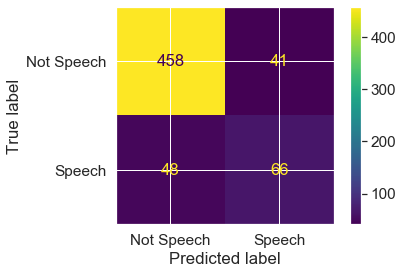

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cmd = ConfusionMatrixDisplay(cm,display_labels=['Not Speech','Speech'])
cmd.plot()